<a href="https://colab.research.google.com/github/n-erfan/Data-Mining-Machine-Learning/blob/main/MiniProject5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Implement a support vector machine to separate and classify the two linearly separable sets given in the data file SVM_data.mat available on Canvas.
Find and show the classifying line. How many support vectors do you have? Mark your support vectors

In [ ]:
#Access to Read from my Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import necessary librarires
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.io

In [ ]:
mat_dic = scipy.io.loadmat('/content/gdrive/MyDrive/Dataset/Data Mining and Machine Learning/SVM_data.mat')

In [ ]:
mat_dic

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Apr 18 18:01:14 2017',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[-0.85822717,  4.09406519],
        [-0.44806372,  2.08015253],
        [-0.61636989,  1.06270493],
        [-2.75809225,  2.63573878],
        [-1.55733726,  3.68202799],
        [-1.0889021 ,  2.59363417],
        [-3.07408562,  2.79015288],
        [-1.79823809,  2.10525385],
        [-1.23713678,  1.84142144],
        [-3.2881872 ,  2.87090745],
        [-2.95296182,  1.80524107],
        [-1.2218255 ,  2.07547449],
        [-2.00633107,  1.47336516],
        [-1.47551319,  1.31451562],
        [-0.6357282 ,  1.73161235],
        [-1.51796067,  0.81165404],
        [-2.78706585,  2.24857898],
        [-1.24800073,  2.10245162],
        [-2.16688791,  1.95899312],
        [-2.81622811, -0.24758231],
        [ 1.48922352, -1.27713648],
        [ 2.24924264, -1.96050151],
        [ 2.36919671, -0.45872123],
        [ 2.17919662, -3.701

In [ ]:
x = mat_dic['x']
y = mat_dic['y']

In [ ]:
x.shape

(40, 2)

In [ ]:
# Get the size of the data
m, n = x.shape

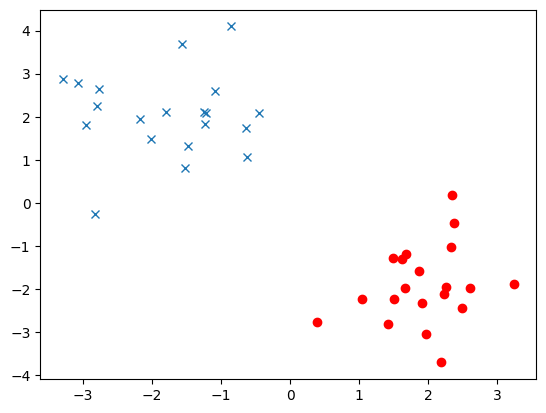

In [ ]:
# Plot the data
plt.plot(x[0:m//2,0], x[0:m//2,1], 'x')
plt.plot(x[m//2:m,0], x[m//2:m,1], 'ro')
plt.show()

In [ ]:
!pip install qpsolvers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 2.4 MB/s eta 0:00:00


In [ ]:
import qpsolvers
from qpsolvers import solve_qp

In [ ]:
Q = np.zeros((m,m))

In [ ]:
for i in range(m):
  for j in range(m):
    # Q[i,j] = y[i].reshape(1,1) * y[j].reshape(1,1) * (x[i].reshape(n,1).T @ x[j].reshape(n,1))
    Q[i,j] = y.reshape(40,)[i] * y.reshape(40,)[j] * (x[i].T @ x[j])

In [ ]:
Q

array([[17.49792365,  8.90082053,  4.87976865, ..., 10.44090841,
        12.6809086 , 10.45104463],
       [ 8.90082053,  4.52779566,  2.48676134, ...,  5.34376504,
         6.4601076 ,  5.32806108],
       [ 4.87976865,  2.48676134,  1.50925361, ...,  3.98355422,
         3.85109681,  3.3025912 ],
       ...,
       [10.44090841,  5.34376504,  3.98355422, ..., 13.97141465,
         9.83945951,  9.03870795],
       [12.6809086 ,  6.4601076 ,  3.85109681, ...,  9.83945951,
         9.85726708,  8.3968093 ],
       [10.45104463,  5.32806108,  3.3025912 , ...,  9.03870795,
         8.3968093 ,  7.25677375]])

In [ ]:
alpha = solve_qp(P=Q, q=-np.ones(m), A=y.T, b=np.zeros(1), lb=np.zeros(m), solver="osqp")

In [ ]:
alpha

array([0.00031186, 0.00052117, 0.2116433 , 0.00042037, 0.00036651,
       0.00048654, 0.00039069, 0.00054503, 0.00062903, 0.00037377,
       0.00044501, 0.00058002, 0.00058931, 0.00070085, 0.00063681,
       0.00073039, 0.00044172, 0.00057428, 0.00052341, 0.00032385,
       0.00111175, 0.00069268, 0.00076847, 0.00045025, 0.00054888,
       0.04812848, 0.15966793, 0.00086729, 0.00058531, 0.00062648,
       0.00068672, 0.00079292, 0.00081159, 0.0010535 , 0.00104368,
       0.0008107 , 0.00067108, 0.00052932, 0.000624  , 0.00076247])

In [ ]:
alpha_appx = alpha.round(2)
alpha_appx

array([0.  , 0.  , 0.21, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.05, 0.16, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
w = np.zeros((n,1))

In [ ]:
for i in range(m):
  w += alpha[i] * y[i] * x[i].reshape((n,1))

In [ ]:
w

array([[ 0.56561223],
       [-0.37371242]])

In [ ]:
nz_ind = np.nonzero(alpha_appx)[0]
nz_ind

array([ 2, 25, 26])

In [ ]:
b1 = y[nz_ind[0]] - w.T @ x[nz_ind[0]].reshape((n,1))
b2 = y[nz_ind[1]] - w.T @ x[nz_ind[1]].reshape((n,1))
b3 = y[nz_ind[2]] - w.T @ x[nz_ind[2]].reshape((n,1))

In [ ]:
w.T @ x[nz_ind[0]].reshape((n,1)) + b1

array([[-1.]])

In [ ]:
w.T @ x[nz_ind[1]].reshape((n,1)) + b2

array([[1.]])

In [ ]:
w.T @ x[nz_ind[2]].reshape((n,1)) + b3

array([[1.]])

In [ ]:
b2

array([[-0.25720467]])

In [ ]:
b3

array([[-0.25724486]])

In [ ]:
b1

array([[-0.25422762]])

In [ ]:
# b0 = (b2+b1)/2
b0 = (b3+b2+b1)/3
b0

array([[-0.25622572]])

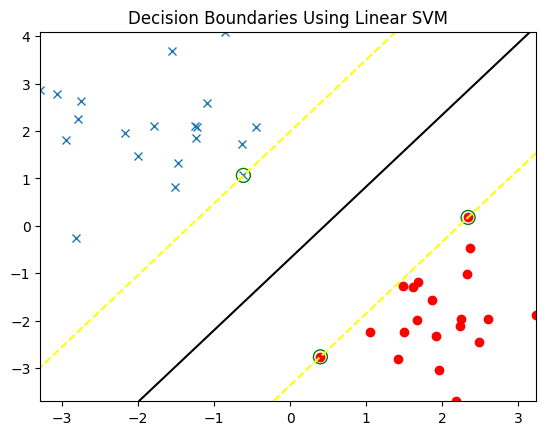

In [ ]:
# Plot the data
plt.plot(x[0:m//2,0], x[0:m//2,1], 'x')
plt.plot(x[m//2:m,0], x[m//2:m,1], 'ro')

# create a meshgrid of the input data
xx, yy = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 100),
                     np.linspace(x[:, 1].min(), x[:, 1].max(), 100))

xy = np.vstack([xx.ravel(), yy.ravel()])

# calculate the decision boundary values
z = (xy.T @ w + b0).reshape(xx.shape)

# plot the contours of the margins and the decision boundary
plt.contour(xx, yy, z, colors=['yellow', 'black', 'yellow'], levels=[-1, 0, 1], alpha=1.0, linestyles=['dashed', 'solid', 'dashed'])

# Highlight the support vectors
for ind in nz_ind:
  plt.scatter(x[ind,0], x[ind,1], s=100, marker='o', facecolor='none', color='green')

plt.title("Decision Boundaries Using Linear SVM")
plt.show()

2. Implement a kernel-based support vector machine to separate and classify the two nonlinearly separable sets given in the data file SVM_data_nonlinear.mat available on Canvas.Find and show the classifying line. How many support vectors do you have? Mark your support vectors.

In [ ]:
mat_dic_nl = scipy.io.loadmat('/content/gdrive/MyDrive/Dataset/Data Mining and Machine Learning/SVM_data_nonlinear.mat')

In [ ]:
mat_dic_nl

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Apr 26 10:54:41 2017',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[ 1.62864443,  1.38013057],
        [ 2.15646751,  1.43470599],
        [ 0.33218064,  1.98529556],
        [ 1.03939482,  0.9045091 ],
        [ 1.23756005,  1.35033226],
        [ 0.28684793,  1.06524807],
        [ 0.180563  ,  1.42066978],
        [ 2.43121751,  3.03515227],
        [ 1.5112449 ,  0.89351714],
        [ 0.85485418,  0.15263733],
        [ 2.30572879,  1.96938312],
        [ 1.73162601,  0.59643306],
        [ 0.51024033,  1.53587964],
        [ 2.8395857 ,  0.87246878],
        [ 1.78950203,  2.03539795],
        [-1.52108294,  2.55288352],
        [-1.86197199,  1.79630952],
        [-3.68413859, -0.05432468],
        [-4.29193604,  2.13256073],
        [-3.07292628,  3.5929407 ],
        [-3.33059888,  3.01841179],
        [-3.84362764,  0.4195975 ],
        [-2.50223034,  1.92133808],
        [-1.51150953,  1.318

In [ ]:
# Flips the input and the plot as per the solution given
# x = mat_dic_nl['x']
x = np.column_stack([mat_dic_nl['x'][:, 0], -mat_dic_nl['x'][:, 1]])
y = mat_dic_nl['y']

In [ ]:
x.shape

(60, 2)

In [ ]:
print(y[29],y[30])

[-1] [1]


In [ ]:
m, n = x.shape

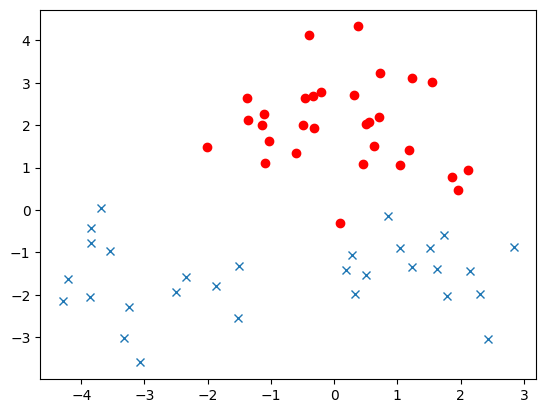

In [ ]:
# Plot the data
plt.plot(x[0:m//2,0], x[0:m//2,1], 'x')
plt.plot(x[m//2:m,0], x[m//2:m,1], 'ro')
plt.show()

In [ ]:
def kernel(x,x_prime):
  return (1 + x.T @ x_prime)**3

In [ ]:
Q = np.zeros((m,m))

In [ ]:
for i in range(m):
  for j in range(m):
    # Q[i,j] = np.dot(y[i], y[j]) * kernel(x[i], x[j])
    # Q[i,j] = y[i].reshape(1,1) * y[j].reshape(1,1) * (x[i].reshape(n,1).T @ x[j].reshape(n,1))
    Q[i,j] = y.reshape(60,)[i] * y.reshape(60,)[j] * (kernel(x[i], x[j]))

In [ ]:
Q

array([[ 1.71624063e+02,  2.73637586e+02,  7.84561384e+01, ...,
        -1.60992825e-02,  1.07332879e+01,  2.06902941e+00],
       [ 2.73637586e+02,  4.58088173e+02,  9.51093180e+01, ...,
        -8.34925047e-02,  1.52786486e+01,  4.95175908e-01],
       [ 7.84561384e+01,  9.51093180e+01,  1.28920979e+02, ...,
         1.01281426e+00,  2.60966898e+01,  1.07693385e+02],
       ...,
       [-1.60992825e-02, -8.34925047e-02,  1.01281426e+00, ...,
         1.37334998e+01,  2.60554115e+01,  1.21162126e+02],
       [ 1.07332879e+01,  1.52786486e+01,  2.60966898e+01, ...,
         2.60554115e+01,  1.16386582e+02,  2.93203303e+02],
       [ 2.06902941e+00,  4.95175908e-01,  1.07693385e+02, ...,
         1.21162126e+02,  2.93203303e+02,  1.80824690e+03]])

In [ ]:
alpha = solve_qp(P=Q, q=-np.ones(m), A=y.T, b=np.zeros(1), lb=np.zeros(m), solver='scs')

In [ ]:
alpha

array([-5.46853652e-06, -2.72695054e-06,  2.57690834e-06, -1.27431445e-05,
       -7.66101262e-06,  2.17182702e-01,  2.13924060e-06,  2.64730033e-09,
       -9.03168807e-06,  1.05143567e+00, -1.37383769e-06, -5.57768308e-06,
       -2.47986312e-06, -7.15150769e-07, -1.74537174e-06,  1.96539683e-06,
        6.10809873e-08, -1.77175546e-06, -5.89537690e-07,  2.84491197e-07,
       -5.84380924e-08, -1.52797381e-06, -7.15376317e-07,  6.26988431e-03,
       -1.60143614e-06, -1.42418390e-06, -5.40757661e-07, -1.35397592e-06,
       -7.04966628e-07, -8.32823585e-07,  1.56747650e-05,  3.76233453e-06,
        7.75386907e-06,  3.53334529e-07,  1.41494590e-05,  2.88987801e-05,
        2.43740480e-05,  4.44200668e-06,  9.45968622e-06,  1.44794483e-05,
        5.21072491e-06,  1.96764841e-05,  1.31516872e-01,  2.61903121e-05,
        1.07993556e-06,  1.51157827e-05,  1.90578528e-05,  1.41006904e-05,
        1.73537022e-05,  1.57384334e-05,  3.39151141e-05,  4.93466689e-05,
        2.44726418e-05,  

In [ ]:
alpha_appx = alpha.round(2)
alpha_appx

array([-0.  , -0.  ,  0.  , -0.  , -0.  ,  0.22,  0.  ,  0.  , -0.  ,
        1.05, -0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  , -0.  ,
       -0.  ,  0.  , -0.  , -0.  , -0.  ,  0.01, -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.13,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.14,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [ ]:
# nz_ind = np.nonzero(alpha_appx)[0]
nz_ind = [i for i, alpha_appx in enumerate(alpha_appx) if alpha_appx > 0]
# nz_ind = [i for i, alpha in enumerate(alpha) if alpha > 0]
nz_ind

[5, 9, 23, 42, 54]

In [ ]:
alpha[9]

1.0514356711113444

In [ ]:
def calc_bias(nz_ind):
  b_list = []
  for i in range(len(nz_ind)):
    sum = 0
    for ind in nz_ind:
      sum += alpha[ind]*kernel(x[ind], x[nz_ind[i]])
    b = y[nz_ind[i],0] - y[nz_ind[i],0] * sum
    b_list.append(b)
  return b_list

In [ ]:
b_list = calc_bias(nz_ind)
b_list

[7.338782943991159,
 9.201079133776895,
 1.5550527591426877,
 -35.886797903179605,
 -2.7057886101014486]

In [ ]:
b_list[len(b_list)//2]

1.5550527591426877

In [ ]:
# b0 = (b1+b2+b3+b4+b5)/5
# b0 = np.mean(b_list)
b0 = b_list[len(b_list)//2] # corr. lowest alpha value
b0

1.5550527591426877

In [ ]:
def sgn(x):
  if x<0:
    return -1
  elif x>0:
    return +1
  else:
    return 0

In [ ]:
# testing the first point
sum = 0
for ind in nz_ind:
  sum += alpha[ind]*y[ind]*kernel(x[ind],x[0])
q0 = sum + b0
print(sgn(q0))

-1


In [ ]:
def nonlin_svm_classifier(nz_ind, b0, xt):
  sum = 0
  for ind in nz_ind:
    sum += alpha[ind]*y[ind,0]*kernel(x[ind],xt)
  return (sum + b0)

In [ ]:
def nonlin_sgn_svm_classifier(nz_ind, b0, xt):
  sum = 0
  for ind in nz_ind:
    sum += alpha[ind]*y[ind,0]*kernel(x[ind],xt)
  return (sgn(sum + b0))

In [ ]:
nonlin_svm_classifier(nz_ind, b0, xt=x[0])

-12.325853169408354

In [ ]:
nonlin_sgn_svm_classifier(nz_ind, b0, xt=x[0])

-1

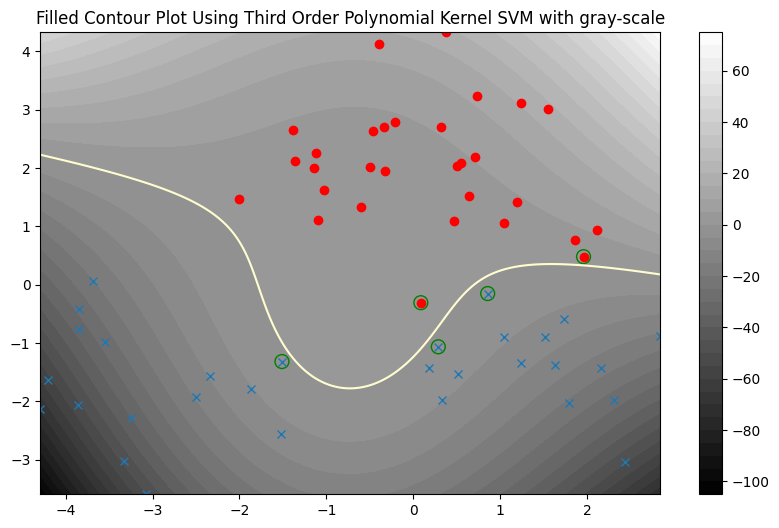

In [ ]:
# Plot the data

plt.figure(figsize=(10,6))

plt.plot(x[0:m//2,0], x[0:m//2,1], 'x')
plt.plot(x[m//2:m,0], x[m//2:m,1], 'ro')

# create a meshgrid of the input data
xx, yy = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 1000),
                     np.linspace(x[:, 1].min(), x[:, 1].max(), 1000))

xy = np.vstack([xx.ravel(), yy.ravel()])

cm = np.zeros(xy.T.shape[0])

for i in range(xy.T.shape[0]):
  cm[i] =  nonlin_svm_classifier(nz_ind, b0, xt=xy.T[i])

plt.contour(xx, yy, cm.T.reshape((1000,1000)), levels = [0], colors = '#FFFDD0')
plt.contourf(xx, yy, cm.T.reshape((1000,1000)), levels = 40, cmap = 'gray')
plt.colorbar()

# Highlight the support vectors
for ind in nz_ind:
  plt.scatter(x[ind,0], x[ind,1], s=100, marker='o', facecolor='none', color='green')

plt.title("Filled Contour Plot Using Third Order Polynomial Kernel SVM with gray-scale")
plt.show()

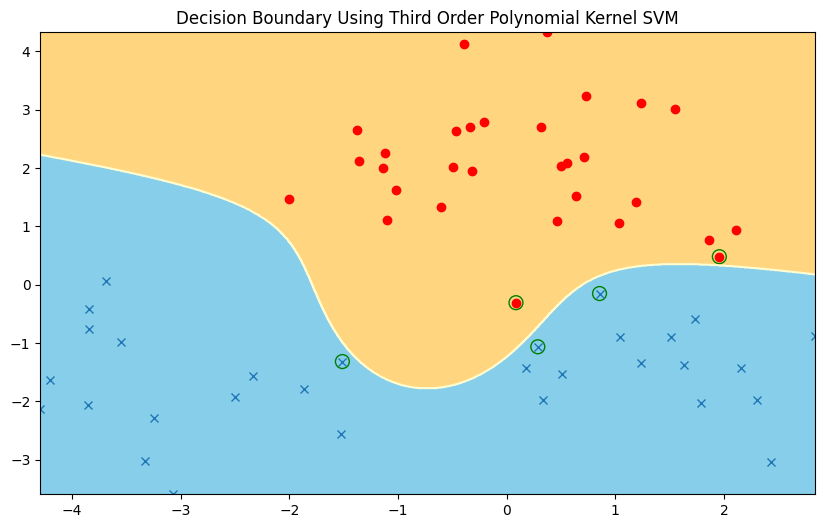

In [ ]:
# Implementation with non-linear sgn classifier
# Plot the data
plt.figure(figsize=(10,6))

plt.plot(x[0:m//2,0], x[0:m//2,1], 'x')
plt.plot(x[m//2:m,0], x[m//2:m,1], 'ro')

# create a meshgrid of the input data
xx, yy = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 1000),
                     np.linspace(x[:, 1].min(), x[:, 1].max(), 1000))
cm = np.zeros(xy.T.shape[0])

for i in range(xy.T.shape[0]):
  cm[i] =  nonlin_sgn_svm_classifier(nz_ind, b0, xt=xy.T[i])

plt.contour(xx, yy, cm.T.reshape((1000,1000)), levels = [0], colors = '#FFFDD0')
plt.contourf(xx, yy, cm.T.reshape((1000,1000)), colors = ['#87CEEB', '#FFD580'])

# Highlight the support vectors
for ind in nz_ind:
  plt.scatter(x[ind,0], x[ind,1], s=100, marker='o', facecolor='none', color='green')

plt.title("Decision Boundary Using Third Order Polynomial Kernel SVM")
plt.show()

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!jupyter nbconvert --to pdf "/content/gdrive/MyDrive/Colab Notebooks/MiniProject5.ipynb"

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/MiniProject5.ipynb to pdf
[NbConvertApp] Support files will be in MiniProject5_files/
[NbConvertApp] Making directory ./MiniProject5_files
[NbConvertApp] Making directory ./MiniProject5_files
[NbConvertApp] Making directory ./MiniProject5_files
[NbConvertApp] Making directory ./MiniProject5_files
[NbConvertApp] Making directory ./MiniProject5_files
[NbConvertApp] Writing 83471 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 196151 bytes to /content/gdrive/MyDrive/Colab Notebooks/MiniProject5.pdf
